<a href="https://colab.research.google.com/github/DavidMichaelH/DavidMichaelH.github.io/blob/master/MultiArmedBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Armed Bandit (IN PROGRESS)**

Multi-Armed Bandit algorithms in general are a form of online learning algorithms. Picture your self in a Cascio facing $n$ slot machines. The pay-off of each machine is an i.i.d. sequence of random variables with distinct means.

Let the value of action \(a\) be denoted by 
 $$ q_*(a) := \mathbb{E} [ R_t | A_t = a ] $$
	

If you knew $( q_*(a) )_{a}$ the $k$-arm bandit problem would not be much of a problem. The dilemma of $k$-arm bandits is that you don't know this information and need to learn it in real time and want to invest with highest payoff.
	
Instead of $q_*(a)$ we consider its estimate at time $t$, $Q_t(a)$. 
 	
The estimate for $Q_t(a)$ is simply,
 	
$$Q_t(a) := \dfrac{\sum_{1 \leq i< t} R_i \textbf{1}_{A_i= a}  }{ \sum_{1 \leq i< t} \textbf{1}_{A_i= a}  }$$

	

In [189]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# **$\epsilon$-Greedy**





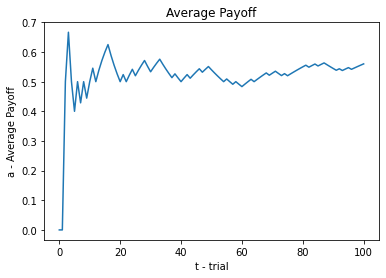

In [208]:
NumberOfActions = 5; #Number of arms
ProbOfWinAction_k = [1/2,1/3,1/4,1/5,1/6];  #Must have Arms number of entries 
NumberOfWins = np.zeros(NumberOfActions);
NumberOfTimesPlayed = np.zeros(NumberOfActions);
CurrentMeanReward = np.zeros(NumberOfActions);
Trials = 100; #Number of times we pull the lever 
epsilon = 0.5;


AveragePayOff = np.zeros(Trials+1);

#Play Each Arm Once
for k in range(NumberOfActions):

  #Play arm k
  NumberOfTimesPlayed[k] = NumberOfTimesPlayed[k]+1;
  if random.random() < ProbOfWinAction_k[k]:
    NumberOfWins[k] = NumberOfWins[k] + 1;
    


  CurrentMeanReward[k] = NumberOfWins[k]/ NumberOfTimesPlayed[k];




for trial in range(Trials):

  #Random sample to explore 
  if random.random() < epsilon/(1 + math.log(math.log(2+trial))):
    #Here we explore
    selected_action = random.choice(range(NumberOfActions));

    #Play arm selected_action
    NumberOfTimesPlayed[selected_action] = NumberOfTimesPlayed[selected_action]+1;
    if random.random() < ProbOfWinAction_k[selected_action]:
      NumberOfWins[selected_action] = NumberOfWins[selected_action] + 1;
      AveragePayOff[trial+1] = (trial*AveragePayOff[trial] +  1 )/(trial+1)
    else:
      AveragePayOff[trial+1] = (trial*AveragePayOff[trial] + 0 )/(trial+1)


    CurrentMeanReward[selected_action] = NumberOfWins[selected_action]/NumberOfTimesPlayed[selected_action];
    
    

  else: 

    #Get best action 
    bestKnownAction = np.argmax(CurrentMeanReward);

    #Play current best selected_action
    NumberOfTimesPlayed[bestKnownAction] = NumberOfTimesPlayed[bestKnownAction]+1;
    if random.random() < ProbOfWinAction_k[bestKnownAction]:
      NumberOfWins[bestKnownAction] = NumberOfWins[bestKnownAction] + 1;
      AveragePayOff[trial+1] = (trial*AveragePayOff[trial] +  1 )/(trial+1)
    else:
      AveragePayOff[trial+1] = (trial*AveragePayOff[trial] + 0 )/(trial+1)
      

    CurrentMeanReward[bestKnownAction] = NumberOfWins[bestKnownAction]/NumberOfTimesPlayed[bestKnownAction];



# plotting the points  
plt.plot(range(Trials+1), AveragePayOff) 
  
# naming the x axis 
plt.xlabel('t - trial') 
# naming the y axis 
plt.ylabel('a - Average Payoff') 
  
# giving a title to my graph 
plt.title('Average Payoff') 
  
# show the plot 
plt.show() 




In [209]:
CurrentMeanReward

array([0.60240964, 0.5       , 0.42857143, 0.33333333, 0.        ])

In [210]:
display(NumberOfTimesPlayed)

array([83.,  6.,  7.,  6.,  3.])

In [211]:
NumberOfWins

array([50.,  3.,  3.,  2.,  0.])